# Bank Customer Segmentation

## Importing Libraries

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

## Data Ingestion

In [19]:
bank_cust = pd.read_csv('bank_transactions.csv')
bank_cust.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


## Data Understanding

In [20]:
bank_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [21]:
bank_cust.describe().round(2)

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,1.046198e+06,1048567.00,1048567.00
mean,1.154035e+05,157087.53,1574.34
std,8.464854e+05,51261.85,6574.74
min,0.000000e+00,0.00,0.00
25%,4.721760e+03,124030.00,161.00
50%,1.679218e+04,164226.00,459.03
75%,5.765736e+04,200010.00,1200.00
max,1.150355e+08,235959.00,1560034.99


## Exploratory Data Analysis

In [22]:
bank_eda = bank_cust.copy()

### Any duplicated values?

In [23]:
print(f'Number of Duplicate Values: {bank_eda.duplicated().sum()}')

Number of Duplicate Values: 0


### Any NULL values?

In [24]:
print("Number of Null Values in the dataset:")
print(bank_eda.isna().sum())

Number of Null Values in the dataset:
TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64


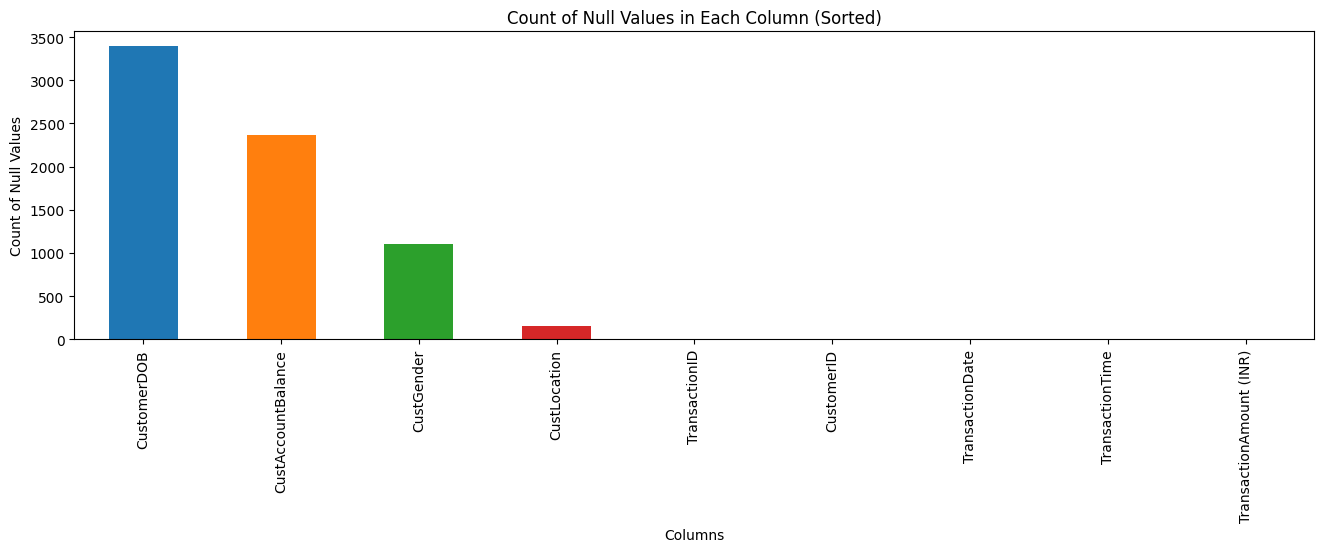

In [32]:
null_values_sorted = null_values.sort_values(ascending= False)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
plt.figure(figsize=(16, 4))
null_values_sorted.plot(kind='bar', color=colors)
plt.xlabel('Columns')
plt.ylabel('Count of Null Values')
plt.title('Count of Null Values in Each Column (Sorted)')
plt.show()

### Counts of Categorical values?

In [44]:
bank_eda.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


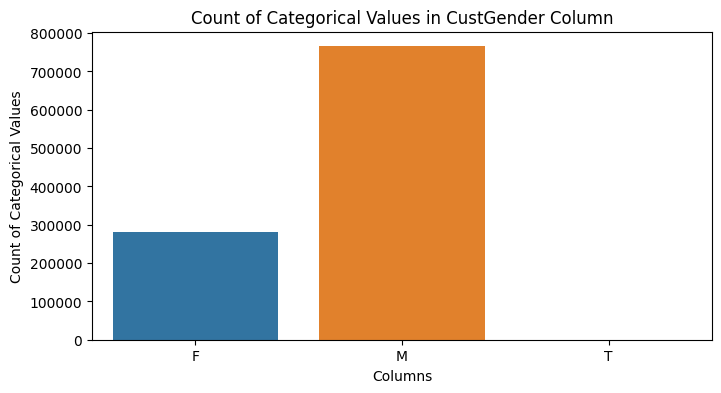

In [46]:
plt.figure(figsize=(8, 4))
sns.countplot(data=bank_eda,x='CustGender')
plt.xlabel('Columns')
plt.ylabel('Count of Categorical Values')
plt.title('Count of Categorical Values in CustGender Column')
plt.show()

In [43]:
print(bank_eda['CustLocation'].value_counts())

MUMBAI                         103595
NEW DELHI                       84928
BANGALORE                       81555
GURGAON                         73818
DELHI                           71019
                                ...  
ROAD (E) THANE                      1
TO APOLO PHARMACY BANGALORE         1
PILLAR NO 725 NEW DELHI             1
COMPANY BANGALORE                   1
IMPERIA THANE WEST                  1
Name: CustLocation, Length: 9355, dtype: int64


### Boxplot for Numerical Columns